In [1]:
#Library
import os
import numpy as np
import shutil
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Dense
from tensorflow.keras.preprocessing import image

In [6]:
#Delete Dir
rootdir = 'C:\Dokumen\Indra\Kuliah\MBKM\Program Bangkit\App\Food\data_img'
for root, dirs, files in os.walk(rootdir + '/splitted', topdown=False):
    for name in files:
        os.remove(os.path.join(root, name))
    for name in dirs:
        os.rmdir(os.path.join(root, name))
os.rmdir(rootdir + '/splitted')

In [9]:
#Split Train Test
rootdir = 'C:\Dokumen\Indra\Kuliah\MBKM\Program Bangkit\App\Food\data_img'
os.getcwd()
classes = []
for i in os.listdir(rootdir + '/raw'):
    classes.append(i)
print(classes)
for i in classes:
    try:
        os.makedirs(rootdir + '/splitted/train/' + i)
        os.makedirs(rootdir + '/splitted/test/' + i)
    except:
        print('direktori sudah dibuat')
        break
    source = rootdir + '/raw/' + i
    allFileNames = os.listdir(source)
    np.random.shuffle(allFileNames)
    test_ratio = 0.3
    train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                        [int(len(allFileNames)* (1 - test_ratio))])
    train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
    test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]
    for name in train_FileNames:
        shutil.copy(name, rootdir + '/splitted/train/' + i)
    for name in test_FileNames:
        shutil.copy(name, rootdir + '/splitted/test/' + i)

['Arem Arem', 'Asinan', 'Ayam Bakar', 'Ayam Geprek', 'Bakso', 'Bakwan', 'Batagor', 'Bubur Ayam', 'Burger', 'Capcai', 'Corndog', 'Empal Gentong', 'Fuyunghai', 'Gado Gado', 'Gudeg', 'Gulai', 'Ikan Bakar', 'Karedok', 'Ketang Goreng', 'Ketoprak', 'Kwetiau Goreng', 'Lontong Sayur', 'Lumpia', 'Martabak Manis', 'Martabak Telur', 'Mendoan', 'Mie Ayam', 'Mie Goreng', 'Nasi Goreng', 'Nasi Uduk', 'Opor', 'Pecel Sayur', 'Pempek', 'Pizza', 'Rawon', 'Rendang', 'Risoles', 'Roti Bakar', 'Roti Canai', 'Sate', 'Sayur Asem', 'Sayur Lodeh', 'Sayur Sop', 'Selat Solo', 'Siomay', 'Soto', 'Steak', 'Tekwan', 'Tongseng', 'Urap']


In [11]:
#Checking Data
train_directory = rootdir + '/splitted/train'
test_directory = rootdir + '/splitted/test'

train_size = 0
test_size = 0
for i in classes:
    print(i + " " + str(len(os.listdir(train_directory + '/' + i))) + " " + str(len(os.listdir(test_directory + '/' + i))) + " " + str(len(os.listdir(rootdir + '/raw/' + i))))
    train_size += len(os.listdir(train_directory + '/' + i))
    test_size += len(os.listdir(test_directory + '/' + i))
print("Total " + str(train_size) + ' ' + str(test_size))

Arem Arem 105 45 150
Asinan 102 44 146
Ayam Bakar 103 45 148
Ayam Geprek 96 42 138
Bakso 104 45 149
Bakwan 97 42 139
Batagor 103 45 148
Bubur Ayam 100 44 144
Burger 102 45 147
Capcai 105 45 150
Corndog 102 45 147
Empal Gentong 88 38 126
Fuyunghai 102 45 147
Gado Gado 104 45 149
Gudeg 101 44 145
Gulai 102 45 147
Ikan Bakar 104 45 149
Karedok 103 45 148
Ketang Goreng 103 45 148
Ketoprak 99 43 142
Kwetiau Goreng 93 41 134
Lontong Sayur 105 45 150
Lumpia 100 44 144
Martabak Manis 103 45 148
Martabak Telur 98 42 140
Mendoan 95 42 137
Mie Ayam 102 44 146
Mie Goreng 98 42 140
Nasi Goreng 103 45 148
Nasi Uduk 103 45 148
Opor 98 42 140
Pecel Sayur 98 42 140
Pempek 100 44 144
Pizza 98 42 140
Rawon 100 44 144
Rendang 105 45 150
Risoles 100 44 144
Roti Bakar 101 44 145
Roti Canai 98 42 140
Sate 104 45 149
Sayur Asem 99 43 142
Sayur Lodeh 101 44 145
Sayur Sop 95 41 136
Selat Solo 100 43 143
Siomay 102 45 147
Soto 102 45 147
Steak 100 43 143
Tekwan 104 45 149
Tongseng 101 44 145
Urap 99 43 142
Total

In [12]:
#Modeling
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(50, activation='softmax')])

#model.compile(optimizer=tf.compat.v1.train.AdamOptimizer(learning_rate=0.0001, epsilon=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=tf.compat.v1.train.AdamOptimizer(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, epsilon=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
#Load Model
# model = tf.keras.models.load_model('my_model.h5')
# model.compile(optimizer=tf.compat.v1.train.AdamOptimizer(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 128)       1

In [14]:
# train_datagen = ImageDataGenerator(rescale=1./255,
#                                     shear_range=0.2)
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_directory,
                                                    batch_size=8,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))
                                                    
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_directory,
                                                      batch_size=8,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

Found 5030 images belonging to 50 classes.
Found 2187 images belonging to 50 classes.


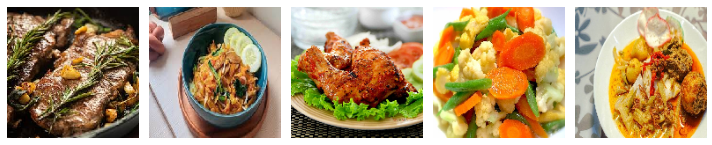

In [15]:
sample_training_images, _ = next(train_generator)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(sample_training_images[:5])

In [16]:
history = model.fit(train_generator,
                    epochs=50,
                    validation_data=test_generator)

Epoch 1/50
314/629 [=============>................] - ETA: 47s - loss: 3.9022 - accuracy: 0.0247

c:\Users\indra\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


629/629 [==============================] - 129s 175ms/step - loss: 3.8185 - accuracy: 0.0346 - val_loss: 3.6350 - val_accuracy: 0.0626
Epoch 2/50
629/629 [==============================] - 56s 88ms/step - loss: 3.4896 - accuracy: 0.0827 - val_loss: 3.4844 - val_accuracy: 0.1020
Epoch 3/50
629/629 [==============================] - 65s 103ms/step - loss: 3.2403 - accuracy: 0.1394 - val_loss: 3.2194 - val_accuracy: 0.1472
Epoch 4/50
629/629 [==============================] - 80s 127ms/step - loss: 2.8879 - accuracy: 0.2211 - val_loss: 3.1246 - val_accuracy: 0.1742
Epoch 5/50
629/629 [==============================] - 47s 75ms/step - loss: 2.4870 - accuracy: 0.3181 - val_loss: 3.0643 - val_accuracy: 0.1934
Epoch 6/50
629/629 [==============================] - 48s 76ms/step - loss: 1.9750 - accuracy: 0.4419 - val_loss: 3.1585 - val_accuracy: 0.2076
Epoch 7/50
629/629 [==============================] - 46s 74ms/step - loss: 1.4312 - accuracy: 0.6038 - val_loss: 3.4524 - val_accuracy: 0.1866

In [27]:
# model.save('my_model.h5')

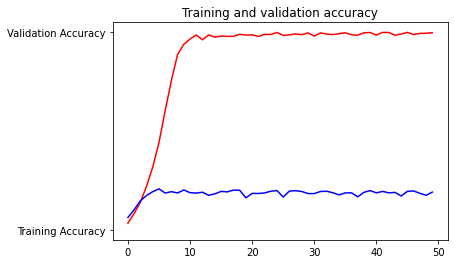

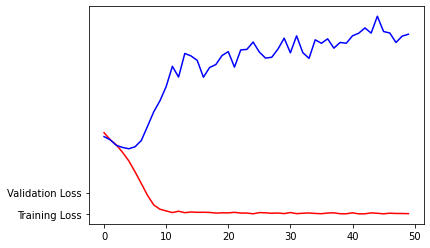

In [18]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()


In [25]:
classIndices = test_generator.class_indices
class_indices = []
for key in classIndices.keys():
    class_indices.append(key)
print(class_indices)

['Arem Arem', 'Asinan', 'Ayam Bakar', 'Ayam Geprek', 'Bakso', 'Bakwan', 'Batagor', 'Bubur Ayam', 'Burger', 'Capcai', 'Corndog', 'Empal Gentong', 'Fuyunghai', 'Gado Gado', 'Gudeg', 'Gulai', 'Ikan Bakar', 'Karedok', 'Ketang Goreng', 'Ketoprak', 'Kwetiau Goreng', 'Lontong Sayur', 'Lumpia', 'Martabak Manis', 'Martabak Telur', 'Mendoan', 'Mie Ayam', 'Mie Goreng', 'Nasi Goreng', 'Nasi Uduk', 'Opor', 'Pecel Sayur', 'Pempek', 'Pizza', 'Rawon', 'Rendang', 'Risoles', 'Roti Bakar', 'Roti Canai', 'Sate', 'Sayur Asem', 'Sayur Lodeh', 'Sayur Sop', 'Selat Solo', 'Siomay', 'Soto', 'Steak', 'Tekwan', 'Tongseng', 'Urap']


In [23]:
def load_image(img_path, show=False):
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    
    img_tensor = np.expand_dims(img_tensor, axis=0)         
    img_tensor /= 255.

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()
        
    return img_tensor
def plotPredImages(image_cvs,class_preds,preds):
    fig, axes = plt.subplots(round(len(image_cvs)/2), 2, figsize=(10,10))
    axes = axes.flatten()
    for img, ax, class_pred, pred in zip(image_cvs, axes, class_preds, preds):
        ax.imshow(img)
        ax.set_title('{} {}'.format(class_pred, pred))
        #ax.axis('off')
    plt.tight_layout()
    plt.show()

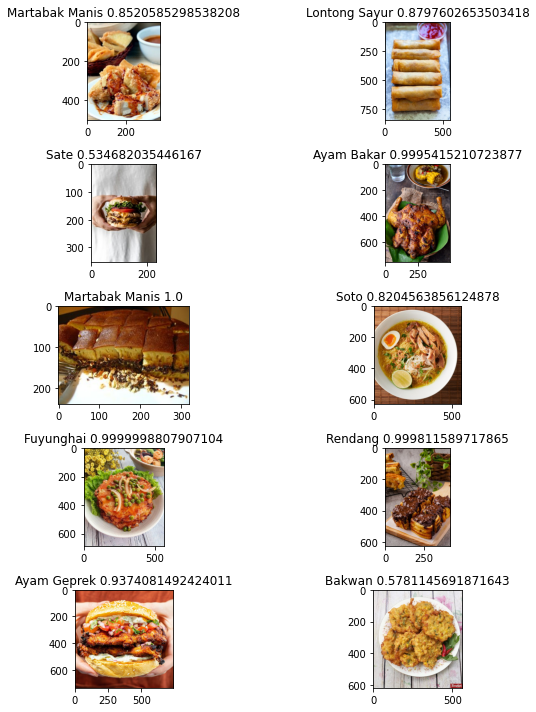

In [26]:
path = rootdir + "/test"
dir = os.listdir(path)

image_cvs = []
class_preds = []
preds = []

for image_file in dir:
    image_file = path + '/' + image_file

    new_image = load_image(image_file)
    pred = model.predict(new_image)
    index_classes = np.argmax(pred)
    class_pred = class_indices[index_classes]
    #print(class_pred)

    image_cv = cv.imread(image_file)[:, :, ::-1]

    image_cvs.append(image_cv)
    class_preds.append(class_pred)
    preds.append(max(pred[0]))

plotPredImages(image_cvs,class_preds,preds)